In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as Scaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
dataframe = pd.read_csv("files/dataset.csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


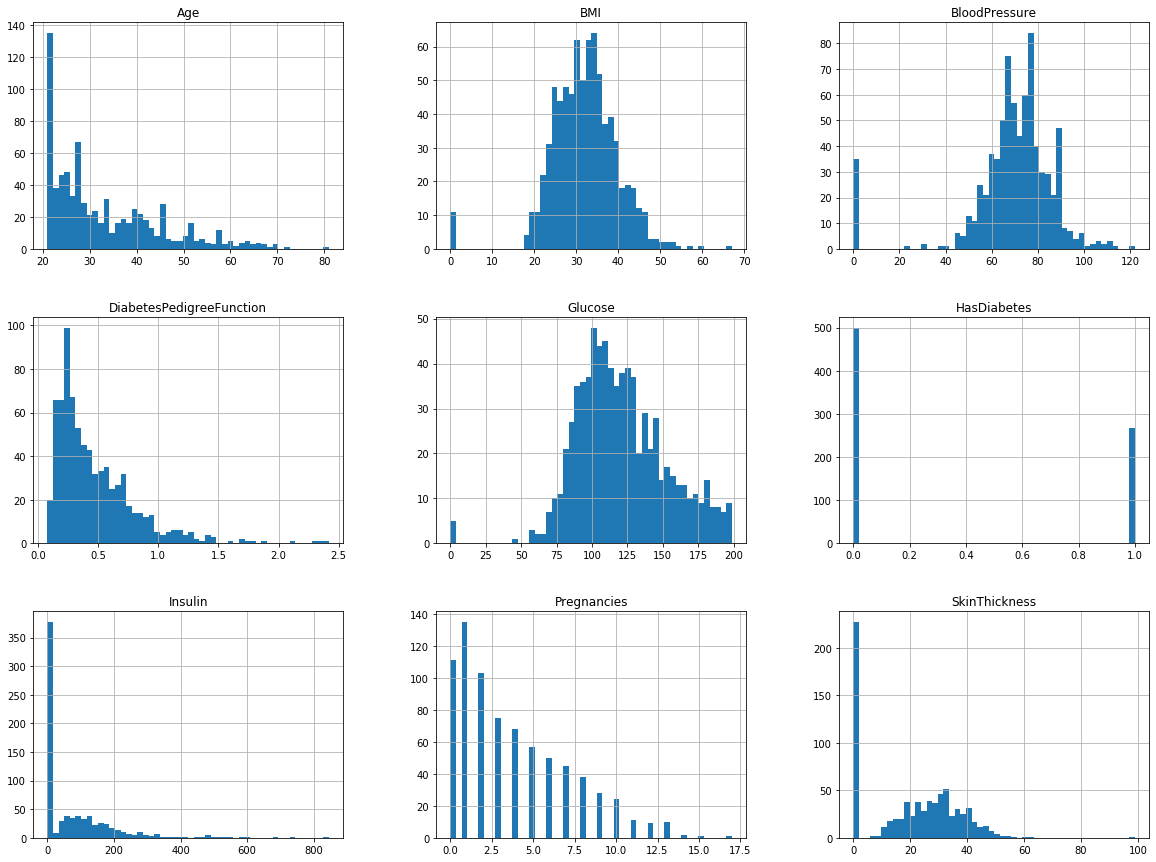

In [3]:
dataframe.hist(bins=50, figsize=(20, 15))
plt.show()

In [4]:
# Calculate the median value for BMI
median_bmi = dataframe['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
dataframe['BMI'] = dataframe['BMI'].replace(
    to_replace=0, value=median_bmi)

In [5]:
# Calculate the median value for BloodP
median_bloodp = dataframe['BloodPressure'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

In [6]:
# Calculate the median value for PlGlcConc
median_plglcconc = dataframe['Glucose'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
dataframe['Glucose'] = dataframe['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

In [7]:
# Calculate the median value for SkinThick
median_skinthick = dataframe['SkinThickness'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
dataframe['SkinThickness'] = dataframe['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

In [8]:
# Calculate the median value for TwoHourSerIns
median_twohourserins = dataframe['Insulin'].median()
# Substitute it in the TwoHourSerIns column of the
# dataset where values are 0
dataframe['Insulin'] = dataframe['Insulin'].replace(
    to_replace=0, value=median_twohourserins)

In [9]:
train_set, test_set = train_test_split(dataframe, train_size=0.8)

In [10]:
train_set.shape

(614, 9)

In [11]:
train_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HasDiabetes
636,5,104,74,23,30.5,28.8,0.153,48,0
537,0,57,60,23,30.5,21.7,0.735,67,0
719,5,97,76,27,30.5,35.6,0.378,52,1
405,2,123,48,32,165.0,42.1,0.520,26,0
371,0,118,64,23,89.0,32.0,1.731,21,0


In [12]:
test_set.shape

(154, 9)

In [13]:
test_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HasDiabetes
728,2,175,88,23,30.5,22.9,0.326,22,0
373,2,105,58,40,94.0,34.9,0.225,25,0
359,1,196,76,36,249.0,36.5,0.875,29,1
543,4,84,90,23,56.0,39.5,0.159,25,0
82,7,83,78,26,71.0,29.3,0.767,36,0


In [14]:
# Remove and save outcome
train_set_labels = train_set["HasDiabetes"].copy()
train_set = train_set.drop("HasDiabetes", axis=1)

test_set_labels = test_set["HasDiabetes"].copy()
test_set = test_set.drop("HasDiabetes", axis=1)

In [15]:
# Transform dataframe
scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [16]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(train_set_scaled, train_set_labels, epochs=100, batch_size=10)

Epoch 1/100
614/614 [==============================] - 0s 312us/step - loss: 0.6749 - accuracy: 0.6303
Epoch 2/100
614/614 [==============================] - 0s 107us/step - loss: 0.6560 - accuracy: 0.6547
Epoch 3/100
614/614 [==============================] - 0s 81us/step - loss: 0.6425 - accuracy: 0.6547
Epoch 4/100
614/614 [==============================] - 0s 77us/step - loss: 0.6266 - accuracy: 0.6596
Epoch 5/100
614/614 [==============================] - 0s 77us/step - loss: 0.6034 - accuracy: 0.6678
Epoch 6/100
614/614 [==============================] - 0s 79us/step - loss: 0.5739 - accuracy: 0.6954
Epoch 7/100
614/614 [==============================] - 0s 77us/step - loss: 0.5472 - accuracy: 0.7085
Epoch 8/100
614/614 [==============================] - 0s 92us/step - loss: 0.5275 - accuracy: 0.7182
Epoch 9/100
614/614 [==============================] - 0s 80us/step - loss: 0.5144 - accuracy: 0.7313
Epoch 10/100
614/614 [==============================] - 0s 83us/step - loss: 0.5

614/614 [==============================] - 0s 72us/step - loss: 0.4258 - accuracy: 0.7964
Epoch 81/100
614/614 [==============================] - 0s 71us/step - loss: 0.4228 - accuracy: 0.7948
Epoch 82/100
614/614 [==============================] - 0s 67us/step - loss: 0.4241 - accuracy: 0.7980
Epoch 83/100
614/614 [==============================] - 0s 68us/step - loss: 0.4245 - accuracy: 0.7899
Epoch 84/100
614/614 [==============================] - 0s 77us/step - loss: 0.4226 - accuracy: 0.7980
Epoch 85/100
614/614 [==============================] - 0s 68us/step - loss: 0.4235 - accuracy: 0.7980
Epoch 86/100
614/614 [==============================] - 0s 67us/step - loss: 0.4215 - accuracy: 0.7932
Epoch 87/100
614/614 [==============================] - 0s 67us/step - loss: 0.4230 - accuracy: 0.7915
Epoch 88/100
614/614 [==============================] - 0s 66us/step - loss: 0.4208 - accuracy: 0.7997
Epoch 89/100
614/614 [==============================] - 0s 72us/step - loss: 0.4235 - 

In [25]:
# evaluate the keras model
_, accuracy = model.evaluate(test_set_scaled, test_set_labels, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.78


In [26]:
example_try = test_set_scaled[:15]
example_outcome = test_set_labels[:15]

In [27]:
print(example_try)

[[0.11764706 0.85064935 0.63043478 0.17391304 0.01983173 0.09611452
  0.1058924  0.01666667]
 [0.11764706 0.3961039  0.30434783 0.35869565 0.09615385 0.34151329
  0.06276687 0.06666667]
 [0.05882353 0.98701299 0.5        0.31521739 0.28245192 0.37423313
  0.34030743 0.13333333]
 [0.23529412 0.25974026 0.65217391 0.17391304 0.05048077 0.43558282
  0.03458582 0.06666667]
 [0.41176471 0.25324675 0.52173913 0.20652174 0.06850962 0.22699387
  0.294193   0.25      ]
 [0.17647059 0.54545455 0.52173913 0.17391304 0.01983173 0.0593047
  0.08112724 0.56666667]
 [0.23529412 0.55194805 0.32608696 0.05434783 0.26081731 0.19018405
  0.19171648 0.16666667]
 [0.05882353 0.23376623 0.27173913 0.17391304 0.01983173 0.01840491
  0.07685739 0.        ]
 [0.         0.37662338 0.36956522 0.42391304 0.07692308 0.45807771
  0.17847993 0.        ]
 [0.17647059 0.83766234 0.58695652 0.2826087  0.55288462 0.35787321
  0.07685739 0.01666667]
 [0.52941176 0.72727273 0.60869565 0.22826087 0.16947115 0.32924335
  0

In [22]:
print(example_outcome)

728    0
373    0
359    1
543    0
82     0
140    0
320    0
90     0
422    0
415    1
152    1
351    0
401    0
589    0
134    0
Name: HasDiabetes, dtype: int64


In [23]:
result =model.predict_classes(example_try)

In [24]:
print(result)

[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
